In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv('house_train.csv')

In [15]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,1413158400000000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
1,5631500400,1424822400000000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
2,1954400510,1424217600000000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503
3,1321400060,1403827200000000000,257500.0,3,2.25,1715,6819,2.0,0,3,7,1715,0,1995,98003,47.3097,-122.327,2238,6819
4,2414600126,1429056000000000000,229500.0,3,1.00,1780,7470,1.0,0,3,7,1050,730,1960,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12672,2997800021,1424304000000000000,475000.0,3,2.50,1310,1294,2.0,0,3,8,1180,130,2008,98116,47.5773,-122.409,1330,1265
12673,6600060120,1424649600000000000,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,98146,47.5107,-122.362,1830,7200
12674,1523300141,1403481600000000000,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2007
12675,291310100,1421366400000000000,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,1287


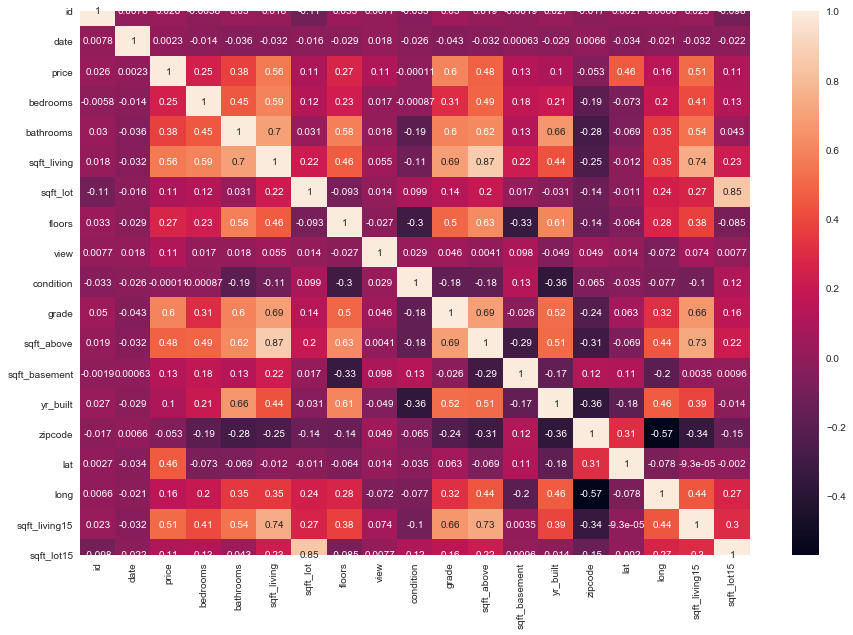

In [16]:
corr = data.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [17]:
high_corr = data.corr()['price'].sort_values(ascending=False)
high_corr

price            1.000000
grade            0.596061
sqft_living      0.560352
sqft_living15    0.511693
sqft_above       0.481312
lat              0.458320
bathrooms        0.376706
floors           0.274273
bedrooms         0.250478
long             0.156784
sqft_basement    0.133343
view             0.112028
sqft_lot15       0.111024
sqft_lot         0.105255
yr_built         0.101111
id               0.026160
date             0.002255
condition       -0.000106
zipcode         -0.053083
Name: price, dtype: float64

In [22]:
data.zipcode.value_counts()

98038    480
98052    457
98034    430
98042    423
98023    411
        ... 
98010     45
98109     40
98070     22
98039      7
98014      6
Name: zipcode, Length: 63, dtype: int64

In [27]:
data.view.value_counts()

0    12517
1      160
Name: view, dtype: int64

In [32]:
zipcode_prices = data.groupby('zipcode')['price'].mean().reset_index().sort_values('price', ascending=False)

In [5]:
zipcode_prices

NameError: name 'zipcode_prices' is not defined